In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('houses_to_rent.csv')

In [5]:
df.head

<bound method NDFrame.head of       Unnamed: 0  city  area  rooms  bathroom  parking spaces floor  \
0              0     1   240      3         3               4     -   
1              1     0    64      2         1               1    10   
2              2     1   443      5         5               4     3   
3              3     1    73      2         2               1    12   
4              4     1    19      1         1               0     -   
...          ...   ...   ...    ...       ...             ...   ...   
6075        6075     1    50      2         1               1     2   
6076        6076     1    84      2         2               1    16   
6077        6077     0    48      1         1               0    13   
6078        6078     1   160      3         2               2     -   
6079        6079     1    60      2         1               1     4   

         animal      furniture      hoa rent amount property tax  \
0         acept      furnished      R$0     R$8,0

In [6]:
df.shape

(6080, 14)

In [7]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [8]:
df['rent amount'].value_counts(normalize=True) *100

R$15,000    2.549342
R$3,000     2.302632
R$3,500     2.220395
R$2,000     2.171053
R$2,500     2.088816
              ...   
R$4,092     0.016447
R$2,465     0.016447
R$2,660     0.016447
R$4,998     0.016447
R$6,553     0.016447
Name: rent amount, Length: 1032, dtype: float64

In [9]:
df = df.drop(df.columns[0], axis=1)

In [11]:
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
import pandas as pd

def missing_data_summary(data):
    missing_data = data.isnull().sum()
    total_rows = len(data)
    
    missing_percent = (missing_data / total_rows * 100).round(2)
    
    missing_summary = pd.DataFrame({
        'Qty NaN': missing_data,
        '% NaN': missing_percent
    })
    
    missing_summary = missing_summary.sort_values(by='% NaN', ascending=False)
    
    return missing_summary


missing_table = missing_data_summary(df)
print(missing_table)

                Qty NaN  % NaN
city                  0    0.0
area                  0    0.0
rooms                 0    0.0
bathroom              0    0.0
parking spaces        0    0.0
floor                 0    0.0
animal                0    0.0
furniture             0    0.0
hoa                   0    0.0
rent amount           0    0.0
property tax          0    0.0
fire insurance        0    0.0
total                 0    0.0


In [13]:
data_encoded = pd.get_dummies(df, columns=['animal', 'furniture'], drop_first=True)

In [14]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [15]:
df['animal'] = pd.Categorical(df['animal'])
df['animal_encoded'] = df['animal'].cat.codes

df['furniture'] = pd.Categorical(df['furniture'])
df['furniture_encoded'] = df['furniture'].cat.codes

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,animal_encoded,furniture_encoded
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121",0,0
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493",0,1
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680",0,0
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116",0,1
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257",1,1


In [16]:
def categorical(df, col):
    df[col] = pd.Categorical(df[col])
    return df[col].cat.codes

df['animal'] = categorical(df, 'animal')
df['furniture'] = categorical(df,'furniture')

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,animal_encoded,furniture_encoded
0,1,240,3,3,4,-,0,0,R$0,"R$8,000","R$1,000",R$121,"R$9,121",0,0
1,0,64,2,1,1,10,0,1,R$540,R$820,R$122,R$11,"R$1,493",0,1
2,1,443,5,5,4,3,0,0,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680",0,0
3,1,73,2,2,1,12,0,1,R$700,"R$1,250",R$150,R$16,"R$2,116",0,1
4,1,19,1,1,0,-,1,1,R$0,"R$1,200",R$41,R$16,"R$1,257",1,1


In [17]:
# Replace missing floor values with 0
df['floor'] = df['floor'].replace('-', 0)

# Loop through monetary columns for cleaning
monetary_columns = ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']
for col in monetary_columns:
    df[col] = df[col].replace(['R\$', ','], '', regex=True)

# Handle special values in 'hoa' and 'property tax' columns
special_values_cols = ['hoa', 'property tax']
for col in special_values_cols:
    df[col] = df[col].replace(['Sem info', 'Incluso'], '0')

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,animal_encoded,furniture_encoded
0,1,240,3,3,4,0,0,0,0,8000,1000,121,9121,0,0
1,0,64,2,1,1,10,0,1,540,820,122,11,1493,0,1
2,1,443,5,5,4,3,0,0,4172,7000,1417,89,12680,0,0
3,1,73,2,2,1,12,0,1,700,1250,150,16,2116,0,1
4,1,19,1,1,0,0,1,1,0,1200,41,16,1257,1,1


In [18]:
df.dtypes

city                  int64
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal                 int8
furniture              int8
hoa                  object
rent amount          object
property tax         object
fire insurance       object
total                object
animal_encoded         int8
furniture_encoded      int8
dtype: object

In [19]:
# Split data into features (X) and target (y)
X = df.drop(['rent amount', 'total'], axis=1)
y = df['rent amount']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
print(comparison_df)

     y_test       y_pred
1430   1200  1241.942647
3875   1099   955.926553
5399   1200  1451.483647
394    2500  2505.973432
2179   1000   994.662306
...     ...          ...
792    2000  2070.653647
2647   1000   886.253605
2493   7650  7103.201883
2272   5500  5129.650844
5196   5500  5358.617456

[1824 rows x 2 columns]


In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 332412.67739122064


In [26]:
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 347.8295374558704


In [28]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


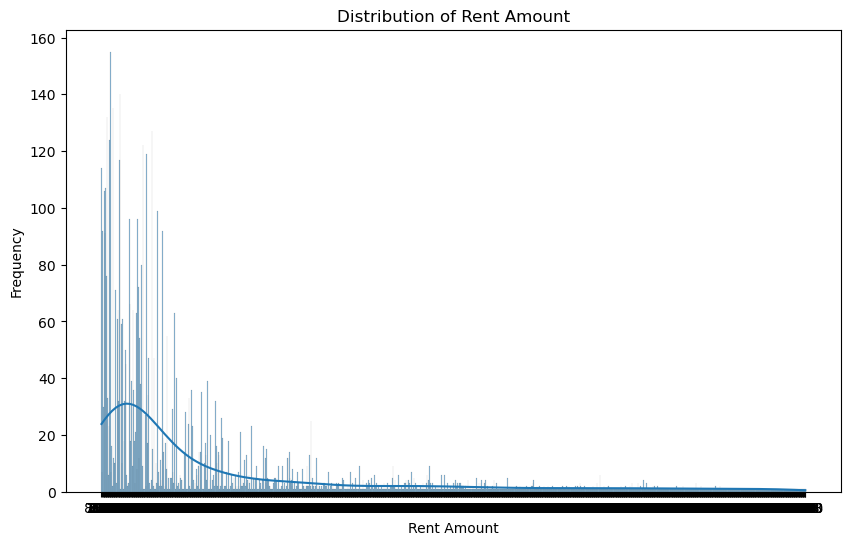

In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of rent amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['rent amount'], bins=30, kde=True)
plt.title('Distribution of Rent Amount')
plt.xlabel('Rent Amount')
plt.ylabel('Frequency')
plt.show()
